In [102]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from PIL import Image as im
import cv2

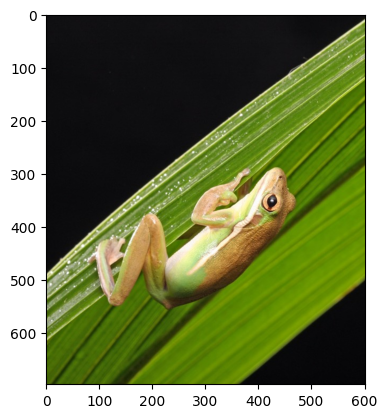

In [103]:
image = img.open("img4.jpg")
plt.imshow(image)

In [104]:
pixels = np.array(image.getdata())
(cols,rows) = image.size

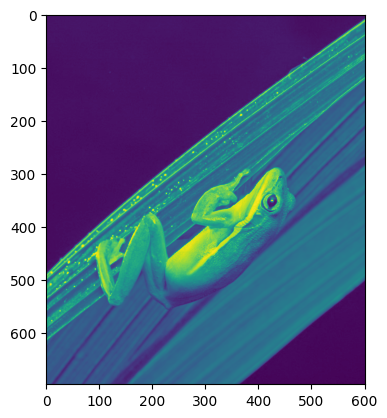

In [105]:
def greyscale(vec,r,c):
    greyim = []
    for i in range(len(vec)):
        newpix = np.linalg.norm(vec[i])
        greyim.append(newpix)
    greyim = np.reshape(greyim,(r,c))
    return greyim

grey = greyscale(pixels, rows,cols)
plt.imshow(grey)

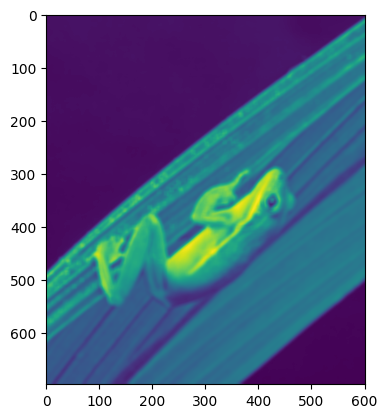

In [106]:
box = (1/(9**2))*np.ones((9,9))
boxblur = cv2.filter2D(src=grey,ddepth=-1,kernel=box)
plt.imshow(boxblur)

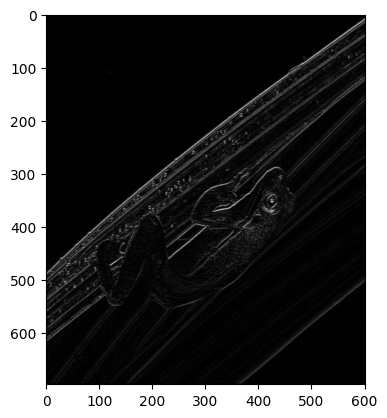

In [107]:
sobelker = np.transpose(np.array([[-1,0,1],[-1,0,1],[-1,0,1]]))
sobeled = cv2.filter2D(src=grey,ddepth=-1,kernel=sobelker)
sobeled = np.abs(sobeled)
plt.imshow(sobeled,cmap='gray')

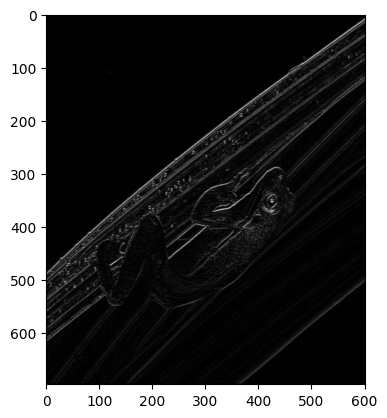

In [108]:
sobeled2 = sp.signal.fftconvolve(grey,sobelker)
sobeled2 = np.abs(sobeled)
plt.imshow(sobeled2,cmap='gray')

In [109]:
def threshold(src,thresh):
    (r,c) = src.shape
    new = np.zeros((r,c))
    for i in range(r):
        for j in range(c):
            if src[i,j] > thresh:
                new[i,j] = 1
            else:
                new[i,j] = 0
    return new

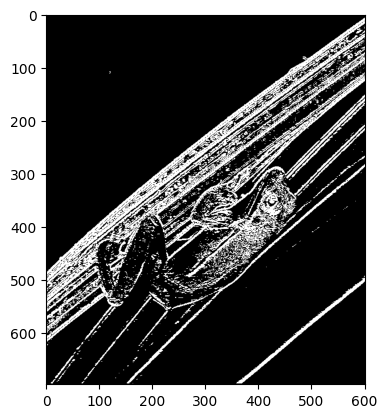

In [110]:
threshed = threshold(sobeled2,50.0)
plt.imshow(threshed,interpolation = None,cmap='gray')
